In [1]:
import pandas as pd

rating = pd.read_csv(r"C:\Users\hp\Downloads\cloths-rating.csv")
rating.head()

,ProductID,UserID,Rating,Text
0,777,AV1YnR7wglJLPUi8IJmi,4,Great taffy at a great price.
1,767,AVpfpK8KLJeJML43BCuD,4,Absolutely wonderful - silky and sexy and comf...
2,1080,AVqkIdntQMlgsOJE6fuB,5,Love this dress! it's sooo pretty.
3,1077,AVpfpK8KLJeJML43BCuD,3,I had such high hopes for this dress and reall...
4,1049,AVpfpK8KLJeJML43BCuD,5,"I love, love, love this jumpsuit. it's fun, fl..."


In [2]:
rating.isnull().sum()

ProductID    0
UserID       0
Rating       0
Text         0
dtype: int64

In [3]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from textblob import TextBlob
from nltk.corpus import stopwords

In [4]:
stop_words = set(stopwords.words())
def polarity(text):
    blob = TextBlob(text)
    words = blob.words
    sentence = [word for word in words if word not in stop_words]
    sent = " ".join(sentence)
    blob2 = TextBlob(sent)
    return blob2.sentiment.polarity

In [8]:
apply = {"Rating": "mean", "Text": lambda x: ".".join(x)}
rating["Polarity"] = rating["Text"].apply(polarity)
rating.loc[rating["Polarity"] > 0, "Sentiment"] = "Positive"
rating.loc[rating["Polarity"] < 0, "Sentiment"] = "Negative"
rating.loc[rating["Polarity"] == 0, "Sentiment"] = "Neutral"
rating.tail()

,ProductID,UserID,Rating,Text,Polarity,Sentiment
629,823,B08GWV3SM6,1,I placed order 4+1 soaps.But I have received w...,0.000000,Neutral
630,823,B08GWV3SM6,3,"The soap is ok for bathing, no scent at all, m...",0.266667,Positive
631,847,B08GWV3SM6,5,For a long time I was searching for Indian soa...,-0.025000,Negative
632,910,AVph0EeEilAPnD_x9myq,3,Good but not great,0.750000,Positive
633,333,AVqkIdntQMlgsOJE6fuB,5,"Quick,easy to make & tasty too.",0.383333,Positive


In [10]:
import nltk
from textblob import TextBlob
from collections import Counter
text = """On 16 November 2013, my cricketing journey finally came to an end at the Wankhede Stadium. After
somehow managing to complete my farewell speech, I was having a conversation with my family,
trying to soak in every moment, when my team-mate Virat Kohli walked up to me. He said, ‘Paaji
aapne kaha tha aap ko yaad dilane ke liye ki aapko pitch pe jana hain.’ (You asked me to remind
you that you had to go to the pitch one final time.) To be honest, I hadn’t forgotten; I was just trying to
put the moment off for a little longer. It was to be my final visit to the 22 yards that had nurtured and
cared for me for so long."""
tokens = nltk.word_tokenize(text)
tags = nltk.pos_tag(tokens)
counts = Counter(tag for word, tag in tags)
print(counts)

Counter({'NN': 25, 'TO': 11, 'PRP': 11, 'IN': 10, 'NNP': 9, 'VBD': 9, 'DT': 8, 'VB': 7, ',': 6, 'PRP$': 5, 'VBG': 5, 'RB': 5, '.': 5, 'JJ': 5, 'CD': 4, 'VBN': 2, 'WRB': 1, 'RP': 1, 'VBZ': 1, 'FW': 1, '(': 1, ')': 1, 'JJS': 1, 'VBP': 1, ':': 1, 'JJR': 1, 'NNS': 1, 'WDT': 1, 'CC': 1})


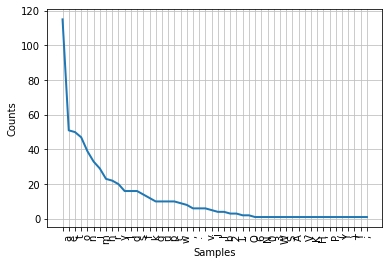

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [11]:
words = nltk.word_tokenize(text)
fre_dist = nltk.FreqDist(text)
fre_dist.plot()

In [13]:
tokens = nltk.word_tokenize(text)
output = list(nltk.bigrams(tokens))
print(output)

[('On', '16'), ('16', 'November'), ('November', '2013'), ('2013', ','), (',', 'my'), ('my', 'cricketing'), ('cricketing', 'journey'), ('journey', 'finally'), ('finally', 'came'), ('came', 'to'), ('to', 'an'), ('an', 'end'), ('end', 'at'), ('at', 'the'), ('the', 'Wankhede'), ('Wankhede', 'Stadium'), ('Stadium', '.'), ('.', 'After'), ('After', 'somehow'), ('somehow', 'managing'), ('managing', 'to'), ('to', 'complete'), ('complete', 'my'), ('my', 'farewell'), ('farewell', 'speech'), ('speech', ','), (',', 'I'), ('I', 'was'), ('was', 'having'), ('having', 'a'), ('a', 'conversation'), ('conversation', 'with'), ('with', 'my'), ('my', 'family'), ('family', ','), (',', 'trying'), ('trying', 'to'), ('to', 'soak'), ('soak', 'in'), ('in', 'every'), ('every', 'moment'), ('moment', ','), (',', 'when'), ('when', 'my'), ('my', 'team-mate'), ('team-mate', 'Virat'), ('Virat', 'Kohli'), ('Kohli', 'walked'), ('walked', 'up'), ('up', 'to'), ('to', 'me'), ('me', '.'), ('.', 'He'), ('He', 'said'), ('said', 

In [14]:
tokens = nltk.word_tokenize(text)
output = list(nltk.trigrams(tokens))
print(output)

[('On', '16', 'November'), ('16', 'November', '2013'), ('November', '2013', ','), ('2013', ',', 'my'), (',', 'my', 'cricketing'), ('my', 'cricketing', 'journey'), ('cricketing', 'journey', 'finally'), ('journey', 'finally', 'came'), ('finally', 'came', 'to'), ('came', 'to', 'an'), ('to', 'an', 'end'), ('an', 'end', 'at'), ('end', 'at', 'the'), ('at', 'the', 'Wankhede'), ('the', 'Wankhede', 'Stadium'), ('Wankhede', 'Stadium', '.'), ('Stadium', '.', 'After'), ('.', 'After', 'somehow'), ('After', 'somehow', 'managing'), ('somehow', 'managing', 'to'), ('managing', 'to', 'complete'), ('to', 'complete', 'my'), ('complete', 'my', 'farewell'), ('my', 'farewell', 'speech'), ('farewell', 'speech', ','), ('speech', ',', 'I'), (',', 'I', 'was'), ('I', 'was', 'having'), ('was', 'having', 'a'), ('having', 'a', 'conversation'), ('a', 'conversation', 'with'), ('conversation', 'with', 'my'), ('with', 'my', 'family'), ('my', 'family', ','), ('family', ',', 'trying'), (',', 'trying', 'to'), ('trying', 't